# Embeddings

Tokens: ['ich', 'liebe', 'pizza', 'pizza', 'ist', 'lecker', 'mein', 'lieblingsessen', 'ist', 'pizza', 'ich', 'liebe', 'es,', 'pizza', 'zu', 'essen', 'ich', 'esse', 'gerne', 'früchte', 'äpfel', 'finde', 'ich', 'appetitlich', 'äpfel', 'sind', 'super', 'ich', 'mag', 'karotten', 'fleisch', 'ist', 'gut', 'fisch', 'ist', 'toll']

Token Embeddings:
                        x         y
Pizza           0.626252  0.166342
Früchte         0.449883 -0.185092
Äpfel           0.812557  0.015223
Karotten        0.402819 -0.029752
Fleisch         0.404031 -0.231410
Fisch           0.545107 -0.520920
Ich            -1.927484 -0.499438
ist            -1.906523 -0.844748
Mein           -1.431788 -0.607443
zu             -1.711412 -0.847237
es             -1.833794 -0.540103
essen          -1.955117 -0.487148
esse           -1.845046 -0.620626
finde          -1.845259 -0.191832
sind           -1.727617 -0.773830
liebe           0.864318 -1.612778
lecker          0.556908 -1.181471
Lieblingsessen  0.970238 

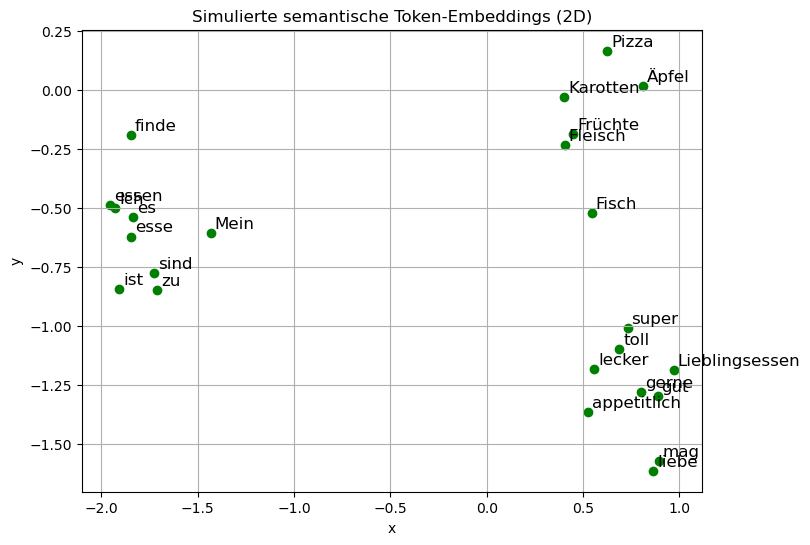

In [16]:
# Importiere benötigte Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Beispieldaten ---
saetze = [
    "Ich liebe Pizza",
    "Pizza ist lecker",
    "Mein Lieblingsessen ist Pizza",
    "Ich liebe es, Pizza zu essen",
    "Ich esse gerne Früchte",
    "Äpfel finde ich appetitlich",
    "Äpfel sind super",
    "Ich mag Karotten",
    "Fleisch ist gut",
    "Fisch ist toll"
]

tokens = []
satz_index = []

for i, satz in enumerate(saetze):
    for token in satz.lower().split():
        tokens.append(token)
        satz_index.append(i)
print("Tokens:", tokens)

# --- 2. Einfache semantische Gruppen definieren ---
# Wir simulieren "ähnliche Bedeutung" durch kleine Gruppen
gruppen = {
    "Speise": ["Pizza", "Früchte", "Äpfel", "Karotten", "Fleisch", "Fisch"],
    "konzepte": ["Ich", "ist", "Mein", "zu", "es", "essen", "esse", "finde", "sind"],
    "positiv": ["liebe", "lecker", "Lieblingsessen", "gerne", "appetitlich", "super", "mag", "gut", "toll"]
}
# --- 3. Erzeuge 2D-Embeddings, ähnlichere Wörter näher zusammen ---
np.random.seed(42)
embedding_dim = 2
token_embeddings = {}

for gruppe, worte in gruppen.items():
    # Basisvektor pro Gruppe zufällig erzeugen
    basis = np.random.randn(embedding_dim)
    for wort in worte:
        # Embedding = Basis + kleiner Zufall → Wörter der Gruppe liegen nah beieinander
        token_embeddings[wort] = basis + 0.2 * np.random.randn(embedding_dim)

# DataFrame für Übersicht
df_embeddings = pd.DataFrame(token_embeddings).T
df_embeddings.columns = ['x', 'y']
print("\nToken Embeddings:\n", df_embeddings)

# --- 4. Visualisierung ---
plt.figure(figsize=(8,6))
plt.scatter(df_embeddings['x'], df_embeddings['y'], color='green')

# Token-Namen neben die Punkte schreiben
for token, (x, y) in zip(df_embeddings.index, df_embeddings.values):
    plt.text(x+0.02, y+0.02, token, fontsize=12)

plt.title("Simulierte semantische Token-Embeddings (2D)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [15]:
def naechstes_wort(wort, embeddings, besucht):
    v1 = embeddings[wort]
    # Alle anderen Wörter mit Distanz berechnen
    dists = []
    for w, v in embeddings.items():
        if w == wort or w in besucht:
            continue
        dist = np.linalg.norm(v1 - v)
        dists.append((w, dist))
    if not dists:
        return None
    # nach Distanz sortieren und das nächste zurückgeben
    dists.sort(key=lambda x: x[1])
    return dists[0][0]

# --- Iterativer Prozess ---
start_wort = "Pizza"
print("Startwort:", start_wort)

aktuelles_wort = start_wort
pfad = [aktuelles_wort]
besucht = {aktuelles_wort}

for i in range(5):
    naechstes = naechstes_wort(aktuelles_wort, token_embeddings, besucht)
    if naechstes is None:
        break
    pfad.append(naechstes)
    besucht.add(naechstes)
    aktuelles_wort = naechstes

print("Pfad der ähnlichsten Wörter:", " -> ".join(pfad))

Startwort: Pizza
Pfad der ähnlichsten Wörter: Pizza -> Äpfel -> Karotten -> Früchte -> Fleisch -> Fisch
